# C. elegans Cell Division Visualization

This notebook demonstrates the visualization capabilities of DevoTG for analyzing C. elegans cell division patterns.

## Overview
- Interactive 3D visualizations with Plotly
- Static plots with customizable coloring schemes
- Animated lineage tree visualizations
- Export capabilities for presentations and publications

In [1]:
# Import required libraries
import sys
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json

# Add parent directory to path to import custom modules
sys.path.append(str(Path.cwd().parent))

# Import DevoTG modules
from devotg.data import DatasetLoader
from devotg.visualization import CellDivisionVisualizer, LineageAnimator
from devotg.utils import ThresholdCalculator

# Configure plotting
%matplotlib inline
plt.style.use('default')

print("DevoTG Visualization Notebook")
print("=============================")

DevoTG Visualization Notebook


## 1. Load Data and Thresholds

In [2]:
# Load processed data and thresholds from previous analysis
data_path = '../data/processed_datasets/processed_cell_data.csv'
thresholds_path = '../data/processed_datasets/calculated_thresholds.json'

try:
    # Load processed data
    df = pd.read_csv(data_path)
    print(f"✅ Loaded processed data: {df.shape}")
    
    # Load calculated thresholds
    with open(thresholds_path, 'r') as f:
        thresholds = json.load(f)
    print("✅ Loaded calculated thresholds")
    
except FileNotFoundError:
    print("⚠️  Processed data not found. Loading raw data and calculating thresholds...")
    
    # Fallback to raw data
    loader = DatasetLoader('../data/cell_lineage_datasets/cells_birth_and_pos.csv')
    df = loader.load_csv()
    
    # Calculate thresholds
    threshold_calc = ThresholdCalculator(method="1sigma")
    thresholds = threshold_calc.calculate_thresholds(df)
    
    print("✅ Loaded raw data and calculated thresholds")

print(f"\nDataset shape: {df.shape}")
print(f"Available columns: {list(df.columns)}")

✅ Loaded processed data: (642, 10)
✅ Loaded calculated thresholds

Dataset shape: (642, 10)
Available columns: ['Parent Cell', 'parent_x', 'parent_y', 'parent_z', 'Daughter 1', 'Daughter 2', 'Birth Time', 'cell_size', 'size_category', 'time_category']


## 2. Initialize Visualizer with Custom Thresholds

In [3]:
# Initialize the cell division visualizer with calculated thresholds
visualizer = CellDivisionVisualizer(
    csv_data=df,
    size_threshold_small=thresholds['size_threshold_small'],
    size_threshold_large=thresholds['size_threshold_large'],
    birth_time_threshold_low=thresholds['birth_time_threshold_low'],
    birth_time_threshold_high=thresholds['birth_time_threshold_high']
)

print("🎨 Cell Division Visualizer Initialized!")
print(f"Total division events: {len(visualizer.division_events)}")
print(f"Size thresholds: {visualizer.size_threshold_small:.2f} | {visualizer.size_threshold_large:.2f}")
print(f"Time thresholds: {visualizer.birth_time_threshold_low:.2f} | {visualizer.birth_time_threshold_high:.2f}")
print(f"Generation map: {len(visualizer.generation_map)} cells mapped")

# Show generation distribution
if visualizer.generation_map:
    gen_series = pd.Series(list(visualizer.generation_map.values()))
    print("\nGeneration distribution:")
    print(gen_series.value_counts().sort_index())

🎨 Cell Division Visualizer Initialized!
Total division events: 642
Size thresholds: 320.88 | 512.65
Time thresholds: 156.32 | 337.83
Generation map: 1203 cells mapped

Generation distribution:
0      62
1     123
2      24
3       8
4      16
5      32
6      60
7     120
8     191
9     215
10    284
11     64
12      4
Name: count, dtype: int64


## 3. Static 3D Visualizations

Creating static 3D visualizations...

1. 📊 Static plot colored by generation


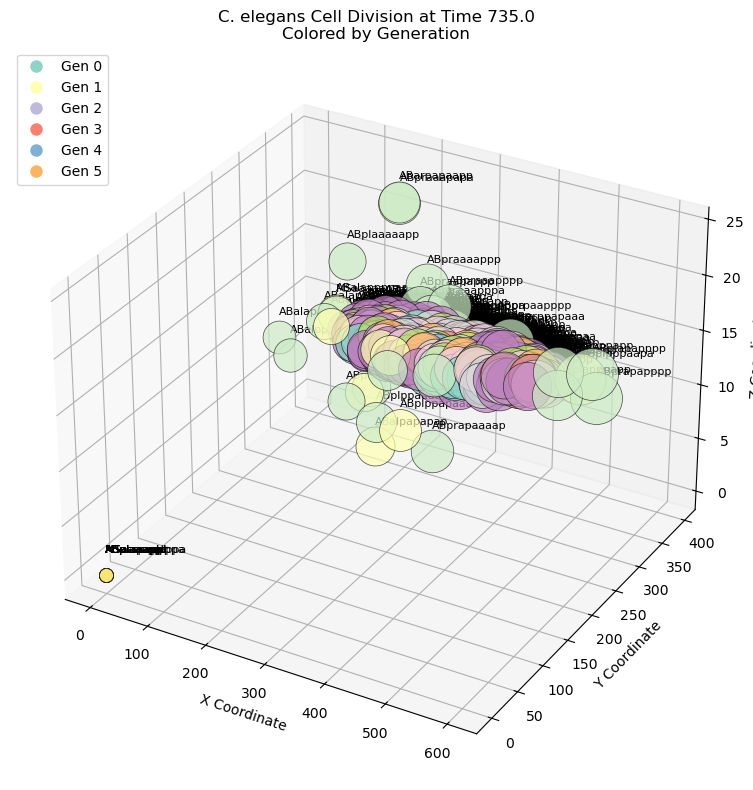

💾 Saved: ../outputs/lineage_analysis/visualizations/static_plot_generation.png


In [4]:
# Create static plots with different coloring schemes
print("Creating static 3D visualizations...")

# 1. Color by generation
print("\n1. 📊 Static plot colored by generation")
fig_gen, ax_gen = visualizer.create_static_plot(color_by='generation')
plt.show()

# Save the figure
output_dir = Path('../outputs/lineage_analysis/visualizations')
output_dir.mkdir(parents=True, exist_ok=True)
fig_gen.savefig(output_dir / 'static_plot_generation.png', dpi=300, bbox_inches='tight')
print(f"💾 Saved: {output_dir / 'static_plot_generation.png'}")


2. 📊 Static plot colored by cell size


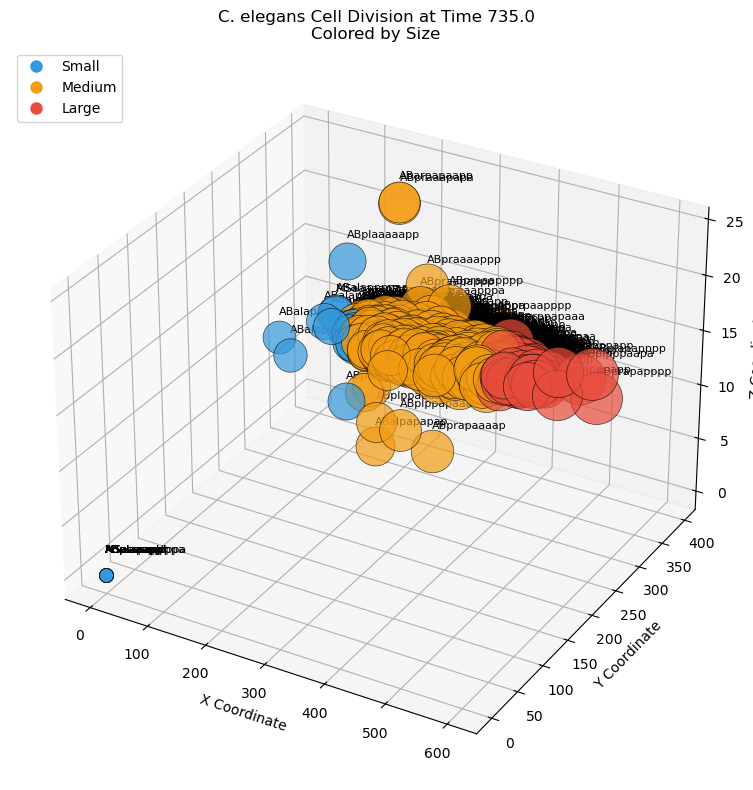

💾 Saved: ../outputs/lineage_analysis/visualizations/static_plot_size.png


In [5]:
# 2. Color by cell size
print("\n2. 📊 Static plot colored by cell size")
fig_size, ax_size = visualizer.create_static_plot(color_by='size')
plt.show()

# Save the figure
fig_size.savefig(output_dir / 'static_plot_size.png', dpi=300, bbox_inches='tight')
print(f"💾 Saved: {output_dir / 'static_plot_size.png'}")


3. 📊 Static plot colored by time category


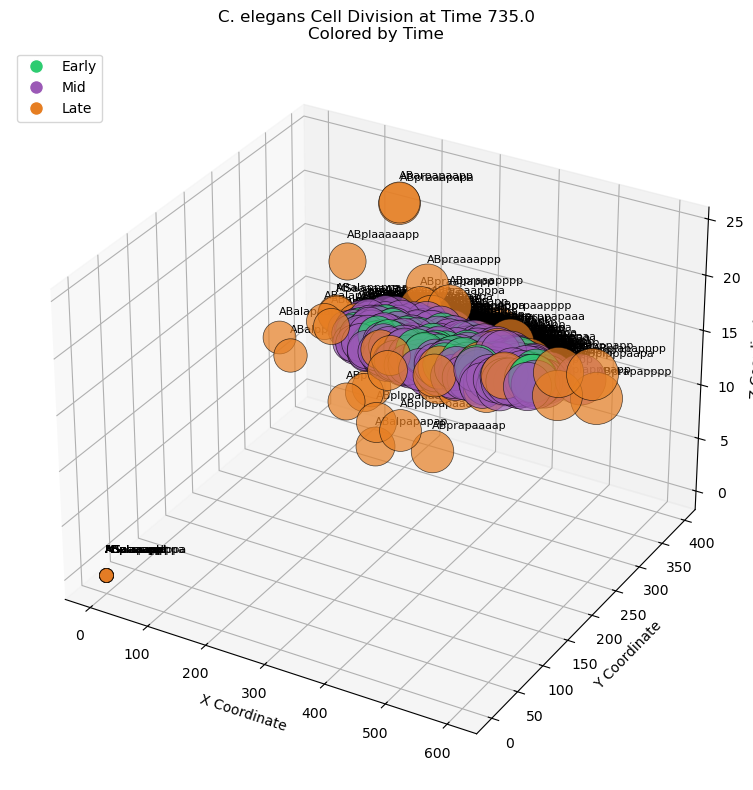

💾 Saved: ../outputs/lineage_analysis/visualizations/static_plot_time.png


In [6]:
# 3. Color by time category
print("\n3. 📊 Static plot colored by time category")
fig_time, ax_time = visualizer.create_static_plot(color_by='time')
plt.show()

# Save the figure
fig_time.savefig(output_dir / 'static_plot_time.png', dpi=300, bbox_inches='tight')
print(f"💾 Saved: {output_dir / 'static_plot_time.png'}")

## 4. Division Pattern Analysis Plots

📈 Creating division pattern analysis plots...


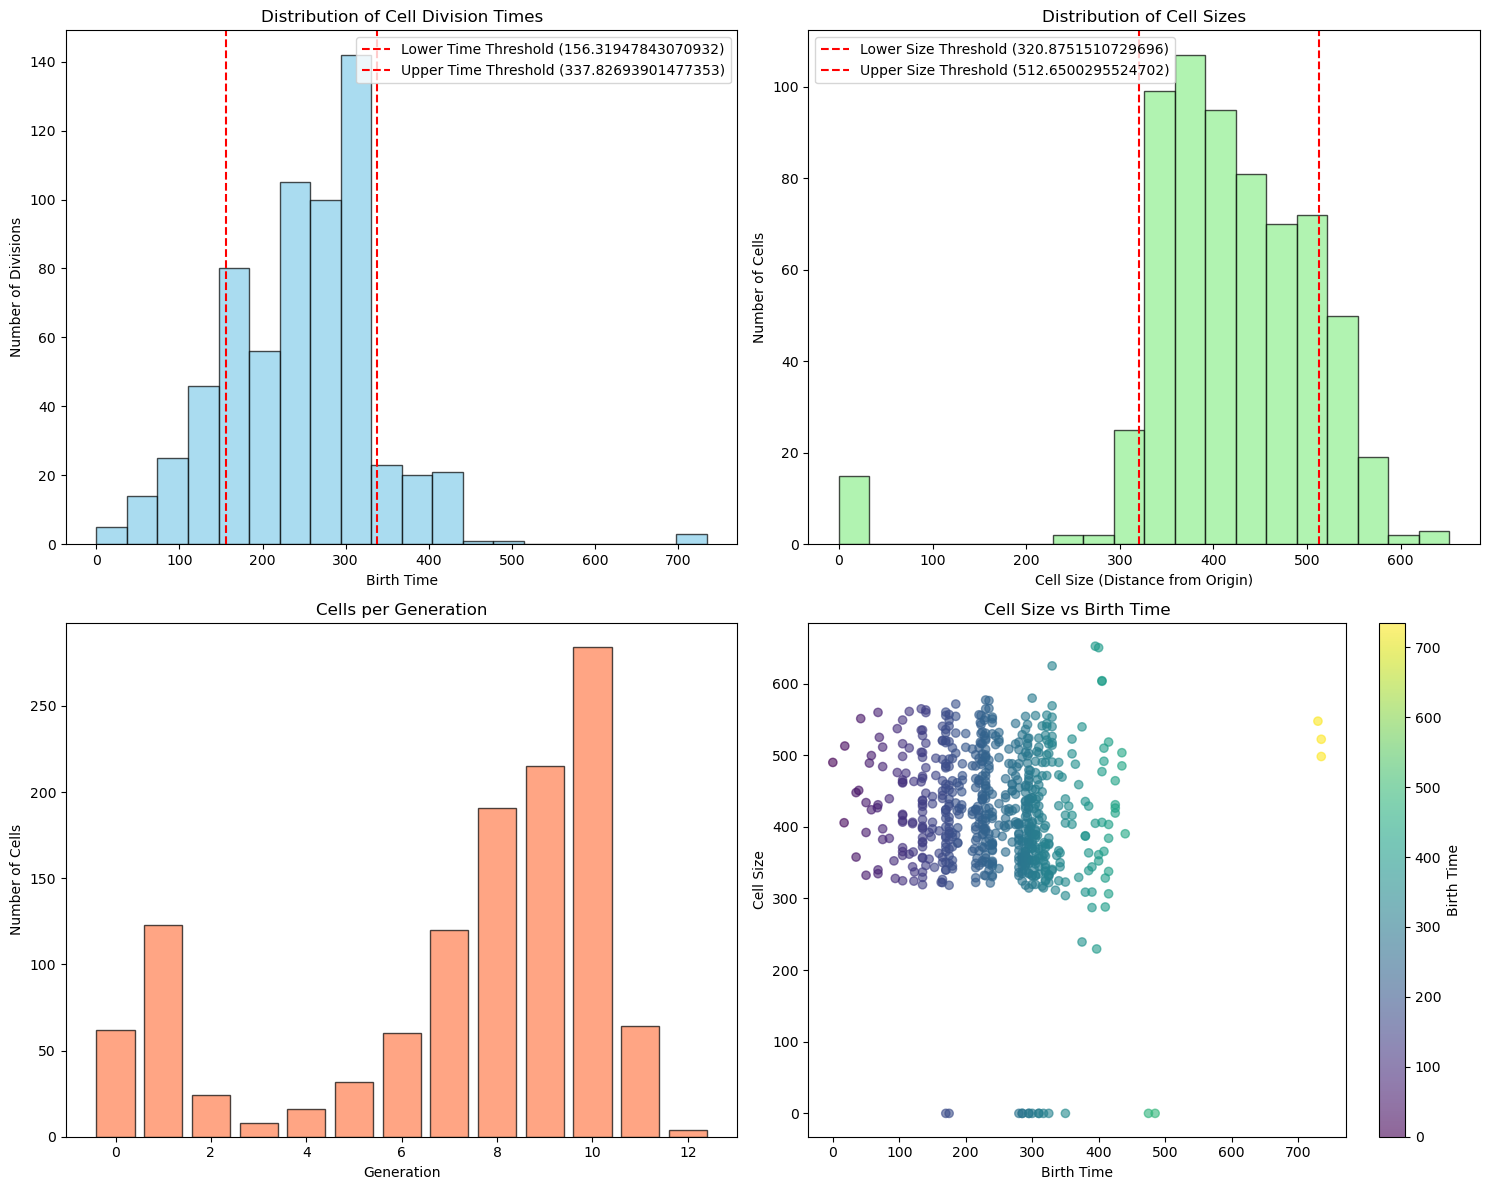

💾 Saved: ../outputs/lineage_analysis/visualizations/division_patterns_analysis.png


In [7]:
# Generate comprehensive division pattern analysis
print("📈 Creating division pattern analysis plots...")
fig_patterns = visualizer.analyze_division_patterns()
plt.show()

# Save the analysis figure
fig_patterns.savefig(output_dir / 'division_patterns_analysis.png', dpi=300, bbox_inches='tight')
print(f"💾 Saved: {output_dir / 'division_patterns_analysis.png'}")

## 5. Interactive 3D Visualizations with Plotly

In [8]:
# Create interactive Plotly visualization
print("🎮 Creating interactive 3D visualization...")
fig_interactive = visualizer.create_interactive_plot(color_by='generation')

# Display in notebook
# fig_interactive.show()
# Optionally display (in your default web browserwser)
# fig_interactive.show(renderer="browser")

# Save as HTML for external use
html_path = output_dir / 'interactive_cell_division_plot.html'
fig_interactive.write_html(str(html_path))
print(f"\n💾 Interactive plot saved: {html_path}")
print("   This can be opened in any web browser for interactive exploration.")

🎮 Creating interactive 3D visualization...

💾 Interactive plot saved: ../outputs/lineage_analysis/visualizations/interactive_cell_division_plot.html
   This can be opened in any web browser for interactive exploration.


In [9]:
# Create additional interactive plots with different color schemes
color_schemes = ['size', 'time']

for scheme in color_schemes:
    print(f"\n🎮 Creating interactive plot colored by {scheme}...")
    fig = visualizer.create_interactive_plot(color_by=scheme)
    
    # Save as HTML
    html_path = output_dir / f'interactive_plot_{scheme}.html'
    fig.write_html(str(html_path))
    print(f"💾 Saved: {html_path}")
    
    # Optionally display (comment out if too many plots)
    # fig.show()
    # Optionally display (in your default web browserwser)
    # fig.show(renderer="browser")


🎮 Creating interactive plot colored by size...
💾 Saved: ../outputs/lineage_analysis/visualizations/interactive_plot_size.html

🎮 Creating interactive plot colored by time...
💾 Saved: ../outputs/lineage_analysis/visualizations/interactive_plot_time.html


## 6. Animated Lineage Tree Visualizations

In [10]:
# Initialize lineage animator
animator = LineageAnimator(visualizer)

# Create animated lineage tree for specific target cells
target_cells = ['ABpl']  # Add more cells as needed: ['ABpl', 'Cppaa']
max_generations = 5

for target_cell in target_cells:
    print(f"\n🎬 Creating animated lineage tree for '{target_cell}'...")
    
    try:
        fig_lineage = animator.draw_animated_lineage_tree_full_edges(
            target_cell=target_cell,
            max_generations=max_generations
        )
        
        if fig_lineage:
            # # Display in notebook
            # fig_lineage.show()
            # # Optionally display (in your default web browserwser)
            # fig_lineage.show(renderer="browser")
            
            # Save as HTML
            lineage_html = output_dir / f'lineage_animation_{target_cell}.html'
            fig_lineage.write_html(str(lineage_html))
            print(f"💾 Saved animated lineage: {lineage_html}")
        else:
            print(f"⚠️  Could not create lineage animation for '{target_cell}'")
            
    except Exception as e:
        print(f"❌ Error creating lineage animation for '{target_cell}': {e}")


🎬 Creating animated lineage tree for 'ABpl'...
🔍 Root of 'ABpl' is 'P0'
Max tree depth: 12
✅ Created animation with 4 steps showing path: P0 → AB → ABp → ABpl
💾 Saved animated lineage: ../outputs/lineage_analysis/visualizations/lineage_animation_ABpl.html


## 7. Matplotlib Animation (Video Export)

🎥 Creating matplotlib animation...
💾 Animation saved as video: ../outputs/lineage_analysis/visualizations/cell_division_animation.mp4


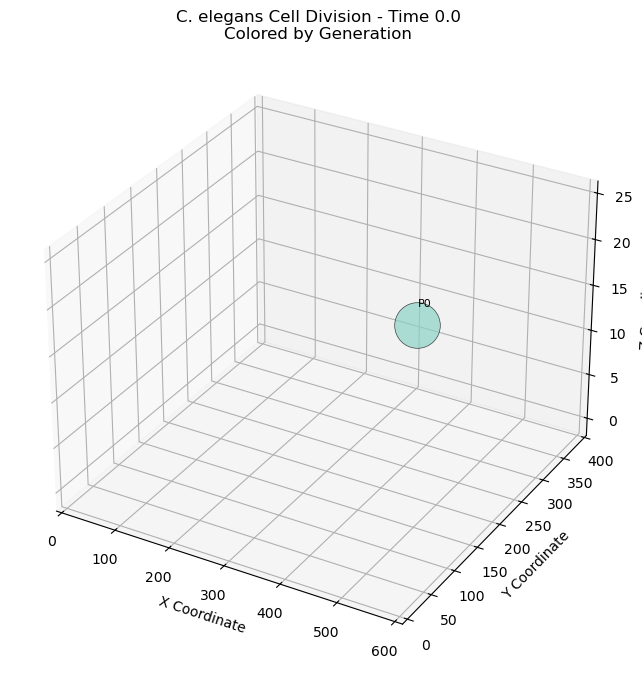

In [11]:
# Create matplotlib animation (for video export)
print("🎥 Creating matplotlib animation...")

try:
    fig_anim, anim = visualizer.create_matplotlib_animation(
        color_by='generation',
        interval=1000,  # milliseconds between frames
        figsize=(12, 8)
    )
    
    # Display first frame
    # plt.show()
    
    # Try to save as video (requires ffmpeg)
    video_path = output_dir / 'cell_division_animation.mp4'
    try:
        anim.save(str(video_path), writer='ffmpeg', fps=2, dpi=150)
        print(f"💾 Animation saved as video: {video_path}")
    except Exception as e:
        print(f"⚠️  Could not save video (ffmpeg may not be installed): {e}")
        
        # Save as GIF instead
        try:
            gif_path = output_dir / 'cell_division_animation.gif'
            anim.save(str(gif_path), writer='pillow', fps=2)
            print(f"💾 Animation saved as GIF: {gif_path}")
        except Exception as e2:
            print(f"⚠️  Could not save GIF either: {e2}")
            
except Exception as e:
    print(f"❌ Error creating matplotlib animation: {e}")

## 8. Data Export and Report Generation

In [12]:
# Export processed data with visualization-ready features
print("💾 Exporting processed visualization data...")

# Export the enhanced dataset
export_path = Path("../data") / 'processed_datasets' / 'visualization_ready_data.csv'
export_path.parent.mkdir(parents=True, exist_ok=True)

exported_data = visualizer.export_data(str(export_path))
print(f"✅ Exported {len(exported_data)} records with visualization features")

# Show sample of exported data
print("\nSample of exported data:")
display(exported_data.head())

💾 Exporting processed visualization data...
Data exported to ../data/processed_datasets/visualization_ready_data.csv
✅ Exported 642 records with visualization features

Sample of exported data:


,parent_cell,parent_x,parent_y,parent_z,daughter1,daughter2,birth_time,cell_size,size_category,time_category,generation
0,P0,422.077778,248.316667,14.326667,AB,P1,0.0,489.914350,medium,early,0
1,AB,317.785054,251.800426,14.700365,ABa,ABp,17.0,405.717754,medium,early,1
2,P1,445.339357,253.860563,15.238196,EMS,P2,18.0,512.839673,large,early,9
3,ABa,251.150370,254.408362,15.063837,ABar,ABal,35.0,357.808667,medium,early,2
4,ABp,358.984127,267.276513,14.877588,ABpr,ABpl,35.0,447.803172,medium,early,2


In [13]:
# Create a summary of all generated visualizations
visualization_summary = {
    'generation_info': {
        'timestamp': str(pd.Timestamp.now()),
        'dataset_shape': df.shape,
        'total_events': len(visualizer.division_events),
        'unique_cells': len(visualizer.generation_map)
    },
    'thresholds_used': thresholds,
    'generated_files': {
        'static_plots': [
            'static_plot_generation.png',
            'static_plot_size.png', 
            'static_plot_time.png',
            'division_patterns_analysis.png'
        ],
        'interactive_plots': [
            'interactive_cell_division_plot.html',
            'interactive_plot_size.html',
            'interactive_plot_time.html'
        ],
        'animations': [
            'lineage_animation_ABpl.html',
            'cell_division_animation.mp4'  # if successfully created
        ]
    }
}

# Save visualization summary
summary_path = output_dir / 'visualization_summary.json'
with open(summary_path, 'w') as f:
    json.dump(visualization_summary, f, indent=2, default=str)
    
print(f"📋 Visualization summary saved: {summary_path}")

📋 Visualization summary saved: ../outputs/lineage_analysis/visualizations/visualization_summary.json


## 9. Advanced Visualization Options

⏰ Creating time-specific visualizations...


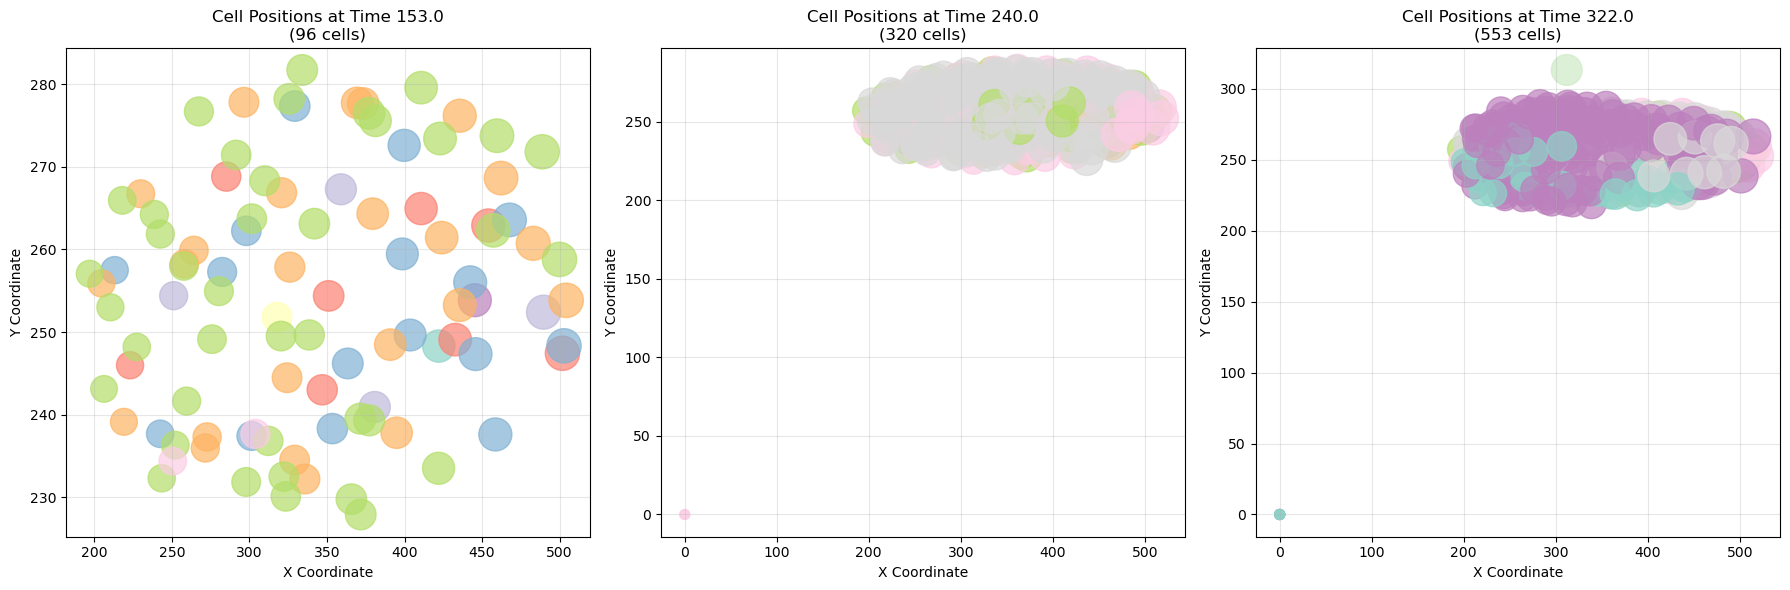

💾 Saved: ../outputs/lineage_analysis/visualizations/time_progression_analysis.png


In [14]:
# Create a custom time-point visualization
print("⏰ Creating time-specific visualizations...")

# Get time points for analysis
time_points = sorted(df['Birth Time'].unique())
selected_times = [time_points[len(time_points)//4], 
                 time_points[len(time_points)//2],
                 time_points[3*len(time_points)//4]]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, time_point in enumerate(selected_times):
    # Create subplot for each time point
    ax = axes[i]
    
    # Get events up to this time point
    events_at_time = [e for e in visualizer.division_events if e['birth_time'] <= time_point]
    
    if events_at_time:
        x_coords = [e['parent_x'] for e in events_at_time]
        y_coords = [e['parent_y'] for e in events_at_time]
        colors = [visualizer.get_cell_color(e, 'generation') for e in events_at_time]
        sizes = [50 + e['cell_size'] for e in events_at_time]
        
        scatter = ax.scatter(x_coords, y_coords, c=colors, s=sizes, alpha=0.7)
        
    ax.set_title(f'Cell Positions at Time {time_point:.1f}\n({len(events_at_time)} cells)')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save the time progression figure
fig.savefig(output_dir / 'time_progression_analysis.png', dpi=300, bbox_inches='tight')
print(f"💾 Saved: {output_dir / 'time_progression_analysis.png'}")

🧬 Creating generation-focused analysis...


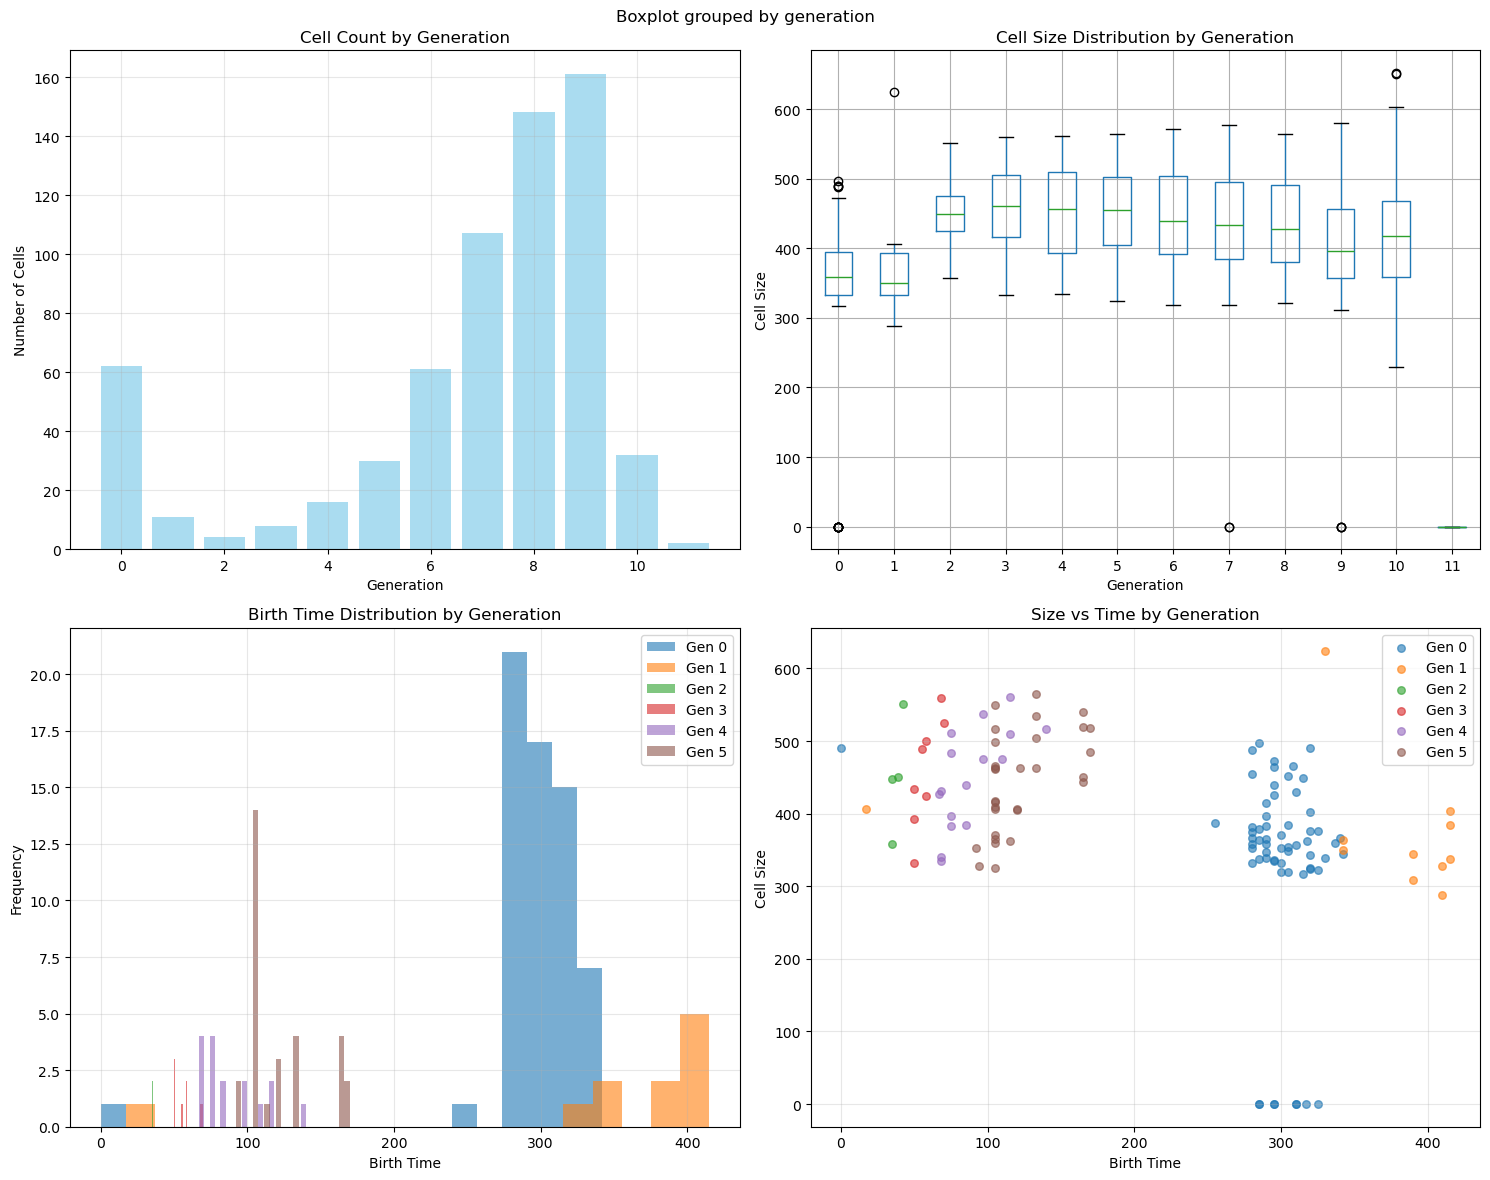

💾 Saved: ../outputs/lineage_analysis/visualizations/generation_analysis.png


In [15]:
# Create generation-focused analysis
if visualizer.generation_map:
    print("🧬 Creating generation-focused analysis...")
    
    # Analyze cells by generation
    generation_data = []
    for event in visualizer.division_events:
        gen = visualizer.generation_map.get(event['parent_cell'], 0)
        generation_data.append({
            'generation': gen,
            'cell_size': event['cell_size'],
            'birth_time': event['birth_time'],
            'parent_cell': event['parent_cell']
        })
    
    gen_df = pd.DataFrame(generation_data)
    
    # Create generation analysis plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Generation distribution
    gen_counts = gen_df['generation'].value_counts().sort_index()
    axes[0, 0].bar(gen_counts.index, gen_counts.values, alpha=0.7, color='skyblue')
    axes[0, 0].set_xlabel('Generation')
    axes[0, 0].set_ylabel('Number of Cells')
    axes[0, 0].set_title('Cell Count by Generation')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Size by generation
    gen_df.boxplot(column='cell_size', by='generation', ax=axes[0, 1])
    axes[0, 1].set_title('Cell Size Distribution by Generation')
    axes[0, 1].set_xlabel('Generation')
    axes[0, 1].set_ylabel('Cell Size')
    
    # Time by generation
    for gen in sorted(gen_df['generation'].unique())[:6]:  # Limit to first 6 generations
        gen_data = gen_df[gen_df['generation'] == gen]['birth_time']
        axes[1, 0].hist(gen_data, alpha=0.6, label=f'Gen {gen}', bins=20)
    axes[1, 0].set_xlabel('Birth Time')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Birth Time Distribution by Generation')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Size vs Time by generation
    for gen in sorted(gen_df['generation'].unique())[:6]:
        gen_data = gen_df[gen_df['generation'] == gen]
        axes[1, 1].scatter(gen_data['birth_time'], gen_data['cell_size'], 
                          alpha=0.6, label=f'Gen {gen}', s=30)
    axes[1, 1].set_xlabel('Birth Time')
    axes[1, 1].set_ylabel('Cell Size')
    axes[1, 1].set_title('Size vs Time by Generation')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Save generation analysis
    fig.savefig(output_dir / 'generation_analysis.png', dpi=300, bbox_inches='tight')
    print(f"💾 Saved: {output_dir / 'generation_analysis.png'}")

## 10. Summary and Next Steps

In [17]:
# Generate final summary
print("\n" + "="*70)
print("VISUALIZATION COMPLETE - SUMMARY")
print("="*70)

print("\n🎨 Visualizations Created:")

# Count files in output directory
png_files = list(output_dir.glob('*.png'))
html_files = list(output_dir.glob('*.html'))
video_files = list(output_dir.glob('*.mp4')) + list(output_dir.glob('*.gif'))

print(f"   📊 Static plots: {len(png_files)} files")
for png_file in png_files:
    print(f"      • {png_file.name}")

print(f"   🎮 Interactive plots: {len(html_files)} files")
for html_file in html_files:
    print(f"      • {html_file.name}")

if video_files:
    print(f"   🎥 Animations: {len(video_files)} files")
    for video_file in video_files:
        print(f"      • {video_file.name}")
else:
    print("   🎥 Animations: Available as HTML files (video export may require ffmpeg)")

print(f"\n📁 Output Directory: {output_dir}")
print(f"   Total files created: {len(list(output_dir.glob('*')))}")

print("\n🎯 Key Features Demonstrated:")
print("   • Static 3D plots with multiple color schemes")
print("   • Interactive web-based visualizations")
print("   • Animated lineage tree exploration")
print("   • Time-based progression analysis")
print("   • Generation-based developmental patterns")

print("\n📈 Dataset Statistics:")
print(f"   • Total cell division events: {len(visualizer.division_events)}")
print(f"   • Unique cells mapped: {len(visualizer.generation_map)}")
print(f"   • Maximum generation depth: {max(visualizer.generation_map.values()) if visualizer.generation_map else 0}")

print("\n💡 Usage Tips:")
print("   • Open .html files in web browser for interactive exploration")
print("   • Use .png files for publications and presentations")
print("   • Adjust thresholds in previous notebook to change categorizations")

print("\n➡️  Next Steps:")
print("   • Run 03_tgn_training.ipynb for temporal graph neural network analysis")
print("   • Run 04_connectome_development_analysis.ipynb for connectome studies")
print("   • Explore generated HTML files for interactive features")
print("   • Use exported data for custom analysis")

print("\n✅ Visualization notebook completed successfully!")
print(f"🎉 All visualizations saved to: {output_dir}")


VISUALIZATION COMPLETE - SUMMARY

🎨 Visualizations Created:
   📊 Static plots: 6 files
      • time_progression_analysis.png
      • static_plot_size.png
      • generation_analysis.png
      • static_plot_generation.png
      • static_plot_time.png
      • division_patterns_analysis.png
   🎮 Interactive plots: 5 files
      • interactive_cell_division_plot.html
      • interactive_plot_generation.html
      • lineage_animation_ABpl.html
      • interactive_plot_size.html
      • interactive_plot_time.html
   🎥 Animations: 1 files
      • cell_division_animation.mp4

📁 Output Directory: ../outputs/lineage_analysis/visualizations
   Total files created: 13

🎯 Key Features Demonstrated:
   • Static 3D plots with multiple color schemes
   • Interactive web-based visualizations
   • Animated lineage tree exploration
   • Time-based progression analysis
   • Generation-based developmental patterns

📈 Dataset Statistics:
   • Total cell division events: 642
   • Unique cells mapped: 1203
  